## Section 0: Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
import io
    
# Downloading the csv file from your GitHub account

url = 'https://raw.githubusercontent.com/JoshWeiner/NBA_Game_Prediction/af83015b98cc363bfee63485c297050b39f1b63d/Final_Team_Stats.csv' # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

df

,Unnamed: 0,Date,Game_ID,Season,H_Team,A_Team,H_Team_Elo_Before,A_Team_Elo_Before,H_Team_Elo_After,A_Team_Elo_After,...,A_Last_10_Avg_FG_Attempts,A_Last_10_Avg_FG_Made,A_Last_10_Avg_FG_Missed,A_Last_10_Avg_2FG_Attempts,A_Last_10_Avg_2FG_Made,A_Last_10_Avg_2FG_Missed,A_Last_10_Avg_3FG_Attempts,A_Last_10_Avg_3FG_Made,A_Last_10_Avg_3FG_Missed,Label
0,4,2008-11-01,10607,2008 - 2009,Phoenix Suns,Portland Trail Blazers,1485.345335,1503.249585,1494.885532,1493.709388,...,77.0,35.0,42.0,61.0,30.0,31.0,16.0,5.0,11.0,1
1,7,2008-11-05,10664,2008 - 2009,Sacramento Kings,Memphis Grizzlies,1487.755097,1508.852834,1493.932569,1502.675362,...,77.0,35.0,42.0,68.0,31.0,37.0,9.0,4.0,5.0,1
2,11,2008-11-07,10690,2008 - 2009,Chicago Bulls,Phoenix Suns,1478.845571,1494.885532,1491.439045,1482.292058,...,61.5,34.5,27.0,45.0,28.5,16.5,16.5,6.0,10.5,1
3,17,2008-11-09,10708,2008 - 2009,Sacramento Kings,Golden State Warriors,1493.932569,1491.147166,1505.570065,1479.509669,...,96.0,33.0,63.0,76.0,30.0,46.0,20.0,3.0,17.0,1
4,19,2008-11-10,10712,2008 - 2009,Boston Celtics,Toronto Raptors,1520.215751,1487.755097,1526.086831,1481.884018,...,77.0,32.0,45.0,69.0,29.0,40.0,8.0,3.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,12620,2020-08-13,732806,2019 - 2020,Los Angeles Lakers,Sacramento Kings,1625.052204,1485.101493,1602.776247,1507.377451,...,88.8,43.9,44.9,55.9,31.7,24.2,32.9,12.2,20.7,0
12397,12621,2020-08-13,732808,2019 - 2020,Orlando Magic,New Orleans Pelicans,1484.608142,1511.427815,1491.555731,1504.480226,...,88.9,42.2,46.7,56.4,30.7,25.7,32.5,11.5,21.0,1
12398,12622,2020-08-14,732814,2019 - 2020,Toronto Raptors,Denver Nuggets,1688.425706,1541.691821,1692.067737,1538.049789,...,86.0,42.5,43.5,54.7,31.0,23.7,31.3,11.5,19.8,1
12399,12623,2020-08-14,732812,2019 - 2020,Indiana Pacers,Miami Heat,1561.235463,1565.550112,1573.228353,1553.557222,...,82.4,38.1,44.3,43.9,24.3,19.6,38.5,13.8,24.7,1


In [5]:
# reading in necessary csv files
games_details = pd.read_csv('data/games_details.csv')
games = pd.read_csv("data/games.csv",parse_dates=["GAME_DATE_EST"],infer_datetime_format=True)
# parsing our dates and putting them into datetime format
games = games.drop_duplicates().sort_values("GAME_DATE_EST").set_index(["GAME_DATE_EST"])
# dropping any duplicate dates, and sorting values so that earliest date comes first. setting the date as our index
ranking = pd.read_csv("data/ranking.csv",parse_dates=["STANDINGSDATE"])
ranking.sort_values("STANDINGSDATE", inplace=True)
players = pd.read_csv('data/players.csv')
teams = pd.read_csv('data/teams.csv')
pd.options.display.max_columns = 50
# making it so that we can see up to 50 columns every time we look at our data

## Section 1: Exploratory Analysis

### Understanding Each Dataset

In [6]:
games_details.head(2)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,Charlotte,1628998,Cody Martin,F,NaN,17:06,0.0,2.0,0.000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,Charlotte,1629023,P.J. Washington,F,NaN,24:58,4.0,17.0,0.235,0.0,3.0,0.0,1.0,2.0,0.5,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0


In [7]:
games.head(2)

,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.5,0.250,20.0,38.0,1
2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.7,0.154,20.0,43.0,1


In [8]:
players.head(2)

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019


In [9]:
ranking.head(2)

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
159591,1610612752,0,22002,2003-10-01,East,New York,82,37,45,0.451,24-17,13-28,NaN
159583,1610612765,0,22002,2003-10-01,East,Detroit,82,50,32,0.610,30-11,20-21,NaN


In [10]:
teams.head(2)

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws


In [11]:
corr_matrix = games.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

print(sol)
corr_matrix

HOME_TEAM_ID     TEAM_ID_home    1.000000
VISITOR_TEAM_ID  TEAM_ID_away    1.000000
PTS_away         FG_PCT_away     0.668344
PTS_home         FG_PCT_home     0.663106
                 AST_home        0.592857
                                   ...   
VISITOR_TEAM_ID  SEASON          0.002648
GAME_ID          FG_PCT_away     0.001855
HOME_TEAM_ID     SEASON          0.001295
SEASON           TEAM_ID_home    0.001295
FG3_PCT_home     FG3_PCT_away    0.000884
Length: 171, dtype: float64


,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
GAME_ID,1.000000,0.026462,0.032588,0.085846,0.026462,0.024514,0.016698,0.033897,0.004990,0.037499,0.008273,0.032588,0.007666,0.001855,0.031238,0.005855,0.047710,0.027572,0.034022
HOME_TEAM_ID,0.026462,1.000000,0.046723,0.001295,1.000000,0.025925,0.002933,0.005436,0.006255,0.103919,0.032364,0.046723,0.012620,0.024044,0.020054,0.015537,0.078197,0.039335,0.019983
VISITOR_TEAM_ID,0.032588,0.046723,1.000000,0.002648,0.046723,0.007574,0.034006,0.006829,0.017595,0.015561,0.013453,1.000000,0.039336,0.024353,0.017947,0.024362,0.014975,0.011753,0.032007
SEASON,0.085846,0.001295,0.002648,1.000000,0.001295,0.302180,0.032380,0.050539,0.023046,0.158363,0.152559,0.002648,0.328095,0.054972,0.049815,0.014923,0.210837,0.181082,0.020254
TEAM_ID_home,0.026462,1.000000,0.046723,0.001295,1.000000,0.025925,0.002933,0.005436,0.006255,0.103919,0.032364,0.046723,0.012620,0.024044,0.020054,0.015537,0.078197,0.039335,0.019983
PTS_home,0.024514,0.025925,0.007574,0.302180,0.025925,1.000000,0.663106,0.178347,0.420438,0.592857,0.154447,0.007574,0.476255,0.126357,0.065321,0.057859,0.189976,0.144450,0.404869
FG_PCT_home,0.016698,0.002933,0.034006,0.032380,0.002933,0.663106,1.000000,0.015261,0.442565,0.548532,0.195904,0.034006,0.114597,0.041699,0.031578,0.017017,0.008770,0.462314,0.430832
FT_PCT_home,0.033897,0.005436,0.006829,0.050539,0.005436,0.178347,0.015261,1.000000,0.025752,0.012855,0.056006,0.006829,0.071700,0.047187,0.035892,0.021345,0.026383,0.115626,0.090805
FG3_PCT_home,0.004990,0.006255,0.017595,0.023046,0.006255,0.420438,0.442565,0.025752,1.000000,0.347645,0.090756,0.017595,0.047844,0.009853,0.017592,0.000884,0.003086,0.195656,0.296387
AST_home,0.037499,0.103919,0.015561,0.158363,0.103919,0.592857,0.548532,0.012855,0.347645,1.000000,0.059329,0.015561,0.168774,0.002764,0.023216,0.009111,0.130335,0.112131,0.308160


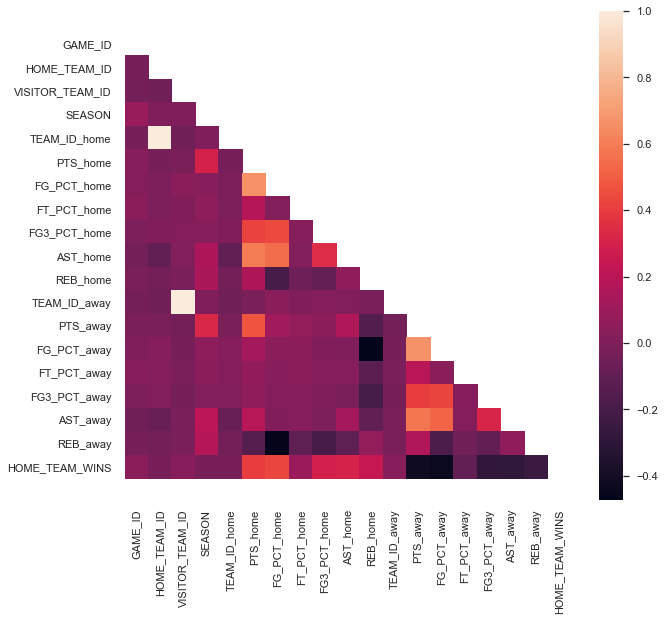

In [12]:
plt.style.use('seaborn')
sns.set(style="white") 
f, ax = plt.subplots(figsize=(10, 9))
mask = np.zeros_like(games.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(games.corr(), mask=mask, square=True)
b, t = plt.ylim() 
b += .75
t -= .75 
plt.ylim(b, t) 
plt.show()

In [13]:
print('Home Team Average Points: ', games.PTS_home.mean())
print('Away Team Average Points: ', games.PTS_away.mean())

Home Team Average Points:  102.28342086161992
Away Team Average Points:  99.33657828444558


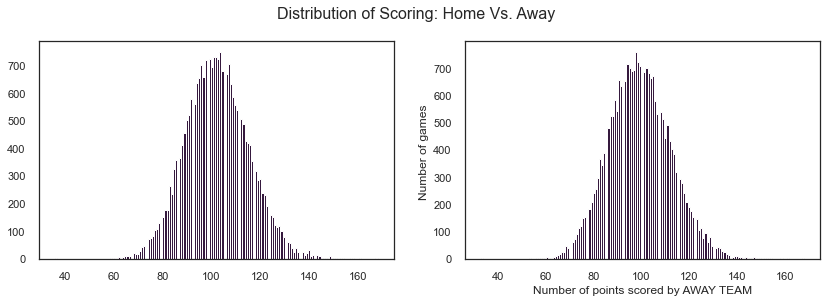

mean: 102.28342086161992 std: 12.949816023318826
mean: 99.33657828444558 std: 13.018652892876455


In [14]:
sns.set_palette("rocket")

fig, axes = plt.subplots(1, 2, figsize = (14,4))

axes[0].hist(games["PTS_home"],bins = int(np.sqrt(len(games["PTS_home"]))))
plt.xlabel("Number of points scored by HOME TEAM")
plt.ylabel("Number of games ")
mean_ptsh = np.mean(games["PTS_home"])
std_ptsh=np.std(games["PTS_home"])

axes[1].hist(games["PTS_away"],bins = int(np.sqrt(len(games["PTS_away"]))))
plt.xlabel("Number of points scored by AWAY TEAM")
plt.ylabel("Number of games ")
mean_ptsa = np.mean(games["PTS_away"])
std_ptsa=np.std(games["PTS_away"])
plt.suptitle("Distribution of Scoring: Home Vs. Away", size=16, y=1)
plt.show()
print ("mean:",mean_ptsh,"std:",std_ptsh)
print ("mean:",mean_ptsa,"std:",std_ptsa)

In [15]:
games.HOME_TEAM_WINS.value_counts()

1    13901
0     9619
Name: HOME_TEAM_WINS, dtype: int64

In [16]:
# show that home teams score more on average than away teams
home_team = games.PTS_home.mean()
away_team = games.PTS_away.mean()
points = (home_team+away_team)/2

#prepare plot labels
label_team= ["Home", "Away"]
values_team = [home_team, away_team]
label_wins = ["Home", "Away"]
values_wins = [home_team_wins, away_team_wins]

#--------------------------Bar Plots--------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(14,4))

sns.barplot(ax = ax[0], x=label_team, y=values_team, palette="Blues_r")
sns.barplot(ax = ax[1], x=games.HOME_TEAM_WINS.value_counts().index, y=games.HOME_TEAM_WINS.value_counts(), order = [1,0], palette="Blues_r")
ax[0].hlines(points, -.5 ,1.5, colors="coral", label="Average Points") #plot average price horizontal line
ax[1].hlines(len(games)/2, -.5 ,1.5, colors="coral", label="Even W V. L") #plot average price horizontal line

#prettify graphs
ax[0].set_ylabel("Points", size=12)
ax[0].set_title("Average Point Disparity", size=14)
ax[0].set_ylim(0,1.1*points)
ax[0].legend()

ax[1].set_ylabel("Count of Wins V. Loses", size=12)
ax[1].set_title("Home Team Wins", size=14)
ax[1].set_xticklabels(['Win', 'Loss'])
# ax[1].set_ylim(0,1.1*)
ax[1].legend()

plt.suptitle("Home Team Advantage", size=16, y=1.02)
plt.show()

NameError: name 'home_team_wins' is not defined

In [ ]:
winning_teams = np.where(games['HOME_TEAM_WINS'] == 1, games['HOME_TEAM_ID'], games['VISITOR_TEAM_ID'])
winning_teams = pd.DataFrame(winning_teams, columns=['TEAM_ID'])
winning_teams = winning_teams.merge(teams[['TEAM_ID', 'NICKNAME']], on='TEAM_ID')['NICKNAME'].value_counts().to_frame().reset_index()
winning_teams.columns = ['TEAM NAME', 'Number of wins']

fig, ax = plt.subplots(figsize=(10,8)) 
sns.barplot(winning_teams['Number of wins'], winning_teams['TEAM NAME'])

ax.set_title("Most Winning Teams", size=16)
ax.set_xlabel("Team", size=14)
ax.set_ylabel("Number of Wins", size=14)

plt.show()

In [ ]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat=np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [ ]:
pearson_r(games.PTS_home, games.PTS_away)

In [ ]:
sns.scatterplot(x="PTS_home",y="AST_home",data=games,alpha=0.5)

plt.xlabel("POINTS SCORED (HOME TEAMS)")
plt.xticks(rotation = 90)
plt.ylabel("ASSIST SCORED (HOME TEAMS)")

plt.show()

print("Pearson correlation coefficient;", (games["PTS_home"]games["AST_home"]))


sns.scatterplot(x="PTS_away",y="AST_away",data=games,alpha=0.5)

plt.xlabel("POINTS SCORED (AWAY TEAMS)")
plt.xticks(rotation = 90)
plt.ylabel("ASSIST SCORED (AWAY TEAMS)")
plt.title

plt.show()
print("Pearson correlation coefficient;",pearson_r(games["PTS_away"],games["AST_away"]))

## Section 2: Data Cleaning

In [300]:
print(df.shape)
ranking.set_index("STANDINGSDATE",inplace=True)
games = pd.merge_asof(games, ranking.add_suffix("_homeTeam"), left_index=True, right_index=True, left_by="HOME_TEAM_ID", right_by='TEAM_ID'+"_homeTeam", allow_exact_matches=False)
# suffixes="_homeTeam",  ## for some reason this gives error, so we workaround it by adding suffixes
games = pd.merge_asof(games, ranking.add_suffix("_awayTeam"),left_index=True, right_index=True, left_by="VISITOR_TEAM_ID", right_by='TEAM_ID'+"_awayTeam", allow_exact_matches=False)
games.drop(["SEASON_ID_awayTeam","TEAM_ID_awayTeam","TEAM_ID_homeTeam"],axis=1,inplace=True) ## redundant
games.rename(columns={"SEASON_ID_homeTeam":"SEASON_ID"},inplace=True)
print(games.shape)

(12401, 49)
(23520, 41)


In [301]:
games

,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,LEAGUE_ID_homeTeam,SEASON_ID,CONFERENCE_homeTeam,TEAM_homeTeam,G_homeTeam,W_homeTeam,L_homeTeam,W_PCT_homeTeam,HOME_RECORD_homeTeam,ROAD_RECORD_homeTeam,RETURNTOPLAY_homeTeam,LEAGUE_ID_awayTeam,CONFERENCE_awayTeam,TEAM_awayTeam,G_awayTeam,W_awayTeam,L_awayTeam,W_PCT_awayTeam,HOME_RECORD_awayTeam,ROAD_RECORD_awayTeam,RETURNTOPLAY_awayTeam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,Final,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.500,0.250,20.0,38.0,1,0,22002,West,Utah,82,47,35,0.573,29-12,18-23,NaN,0,West,Dallas,82,60,22,0.732,33-8,27-14,NaN
2003-10-06,10300002,Final,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1,0,12003,West,Memphis,0,0,0,0.000,0-0,0-0,NaN,0,East,Milwaukee,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300009,Final,1610612758,1610612746,2003,1610612758,101.0,0.467,0.871,0.444,19.0,39.0,1610612746,82.0,0.368,0.609,0.364,13.0,50.0,1,0,12003,West,Sacramento,0,0,0,0.000,0-0,0-0,NaN,0,West,L.A. Clippers,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300005,Final,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,0.429,22.0,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1,0,12003,West,Portland,0,0,0,0.000,0-0,0-0,NaN,0,West,Houston,0,0,0,0.000,0-0,0-0,NaN
2003-10-07,10300007,Final,1610612748,1610612755,2003,1610612748,86.0,0.352,0.647,0.222,15.0,55.0,1610612755,79.0,0.329,0.897,0.143,7.0,44.0,1,0,12003,East,Miami,0,0,0,0.000,0-0,0-0,NaN,0,East,Philadelphia,0,0,0,0.000,0-0,0-0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,Final,1610612761,1610612748,2020,1610612761,105.0,0.380,0.737,0.356,27.0,37.0,1610612748,117.0,0.534,0.741,0.514,30.0,51.0,0,0,12020,East,Toronto,2,2,0,1.000,0-0,2-0,NaN,0,East,Miami,1,0,1,0.000,0-1,0-0,NaN
2020-12-18,12000039,Final,1610612754,1610612755,2020,1610612754,107.0,0.371,0.692,0.262,19.0,45.0,1610612755,113.0,0.533,0.629,0.355,23.0,48.0,0,0,12020,East,Indiana,2,0,2,0.000,0-0,0-2,NaN,0,East,Philadelphia,1,1,0,1.000,1-0,0-0,NaN
2020-12-19,12000049,Final,1610612763,1610612737,2020,1610612763,116.0,0.400,0.744,0.396,21.0,43.0,1610612737,117.0,0.422,0.837,0.297,24.0,47.0,0,0,12020,West,Memphis,3,3,0,1.000,1-0,2-0,NaN,0,East,Atlanta,3,1,2,0.333,1-1,0-1,NaN


In [302]:
games.drop(columns = ['HOME_TEAM_ID', 'VISITOR_TEAM_ID','GAME_STATUS_TEXT','TEAM_ID_home', 'TEAM_ID_away', 'LEAGUE_ID_homeTeam', 'SEASON_ID','RETURNTOPLAY_homeTeam', 'RETURNTOPLAY_awayTeam', 'LEAGUE_ID_awayTeam'], inplace = True)

In [303]:
# putting win percentage at .500 when a team has not played a game yet
def win_percent(row):
    if row['G_homeTeam'] ==0:
        row['W_PCT_homeTeam'] = .500
    if row['G_awayTeam'] ==0:
        row['W_PCT_awayTeam'] = .500
    return row
games = games.apply(win_percent, axis = 1)

In [304]:
games.dropna(inplace = True)

In [305]:
games

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,CONFERENCE_homeTeam,TEAM_homeTeam,G_homeTeam,W_homeTeam,L_homeTeam,W_PCT_homeTeam,HOME_RECORD_homeTeam,ROAD_RECORD_homeTeam,CONFERENCE_awayTeam,TEAM_awayTeam,G_awayTeam,W_awayTeam,L_awayTeam,W_PCT_awayTeam,HOME_RECORD_awayTeam,ROAD_RECORD_awayTeam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0,1,West,Utah,82,47,35,0.573,29-12,18-23,West,Dallas,82,60,22,0.732,33-8,27-14
2003-10-06,10300002,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,West,Memphis,0,0,0,0.500,0-0,0-0,East,Milwaukee,0,0,0,0.500,0-0,0-0
2003-10-07,10300009,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0,1,West,Sacramento,0,0,0,0.500,0-0,0-0,West,L.A. Clippers,0,0,0,0.500,0-0,0-0
2003-10-07,10300005,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,West,Portland,0,0,0,0.500,0-0,0-0,West,Houston,0,0,0,0.500,0-0,0-0
2003-10-07,10300007,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0,1,East,Miami,0,0,0,0.500,0-0,0-0,East,Philadelphia,0,0,0,0.500,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0,East,Toronto,2,2,0,1.000,0-0,2-0,East,Miami,1,0,1,0.000,0-1,0-0
2020-12-18,12000039,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0,East,Indiana,2,0,2,0.000,0-0,0-2,East,Philadelphia,1,1,0,1.000,1-0,0-0
2020-12-19,12000049,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0,West,Memphis,3,3,0,1.000,1-0,2-0,East,Atlanta,3,1,2,0.333,1-1,0-1


In [306]:
def win_percent(row):
    if row['G_homeTeam'] ==0:
        row['W_PCT_homeTeam'] = .500
    if row['G_awayTeam'] ==0:
        row['W_PCT_awayTeam'] = .500
    return row
games = games.apply(win_percent, axis = 1)

In [307]:
games

,GAME_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,CONFERENCE_homeTeam,TEAM_homeTeam,G_homeTeam,W_homeTeam,L_homeTeam,W_PCT_homeTeam,HOME_RECORD_homeTeam,ROAD_RECORD_homeTeam,CONFERENCE_awayTeam,TEAM_awayTeam,G_awayTeam,W_awayTeam,L_awayTeam,W_PCT_awayTeam,HOME_RECORD_awayTeam,ROAD_RECORD_awayTeam
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0,1,West,Utah,82,47,35,0.573,29-12,18-23,West,Dallas,82,60,22,0.732,33-8,27-14
2003-10-06,10300002,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,West,Memphis,0,0,0,0.500,0-0,0-0,East,Milwaukee,0,0,0,0.500,0-0,0-0
2003-10-07,10300009,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0,1,West,Sacramento,0,0,0,0.500,0-0,0-0,West,L.A. Clippers,0,0,0,0.500,0-0,0-0
2003-10-07,10300005,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,West,Portland,0,0,0,0.500,0-0,0-0,West,Houston,0,0,0,0.500,0-0,0-0
2003-10-07,10300007,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0,1,East,Miami,0,0,0,0.500,0-0,0-0,East,Philadelphia,0,0,0,0.500,0-0,0-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0,East,Toronto,2,2,0,1.000,0-0,2-0,East,Miami,1,0,1,0.000,0-1,0-0
2020-12-18,12000039,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0,East,Indiana,2,0,2,0.000,0-0,0-2,East,Philadelphia,1,1,0,1.000,1-0,0-0
2020-12-19,12000049,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0,West,Memphis,3,3,0,1.000,1-0,2-0,East,Atlanta,3,1,2,0.333,1-1,0-1


## Section 3: Feature Engineering

In [308]:
teams = games.TEAM_homeTeam.unique()

In [309]:
teams

array(['Utah', 'Memphis', 'Sacramento', 'Portland', 'Miami', 'Phoenix',
       'Dallas', 'Detroit', 'Washington', 'Boston', 'Atlanta', 'Toronto',
       'New Orleans', 'Seattle', 'Indiana', 'Philadelphia', 'San Antonio',
       'L.A. Lakers', 'Denver', 'Golden State', 'Chicago', 'Minnesota',
       'New York', 'Orlando', 'Houston', 'L.A. Clippers', 'New Jersey',
       'Milwaukee', 'Cleveland', 'Charlotte', 'New Orleans/Oklahoma City',
       'Oklahoma City', 'Brooklyn', 'LA Clippers'], dtype=object)

In [310]:
games.columns

Index(['GAME_ID', 'SEASON', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home',
       'FG3_PCT_home', 'AST_home', 'REB_home', 'PTS_away', 'FG_PCT_away',
       'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS',
       'CONFERENCE_homeTeam', 'TEAM_homeTeam', 'G_homeTeam', 'W_homeTeam',
       'L_homeTeam', 'W_PCT_homeTeam', 'HOME_RECORD_homeTeam',
       'ROAD_RECORD_homeTeam', 'CONFERENCE_awayTeam', 'TEAM_awayTeam',
       'G_awayTeam', 'W_awayTeam', 'L_awayTeam', 'W_PCT_awayTeam',
       'HOME_RECORD_awayTeam', 'ROAD_RECORD_awayTeam'],
      dtype='object')

In [311]:
stats = ['PTS', 'FG_PCT', 'FT_PCT',
       'FG3_PCT', 'AST', 'REB']

In [312]:
for stat in stats:
    print(stat+'_home')

PTS_home
FG_PCT_home
FT_PCT_home
FG3_PCT_home
AST_home
REB_home


In [313]:
for stat in stats:
    for team in teams:
        x = games.loc[(games.TEAM_homeTeam == team) | (games.TEAM_awayTeam == team), :]
        rolling = pd.Series(np.where(x.TEAM_homeTeam == team, x[stat+'_home'], x[stat+'_away'])).rolling(10).mean()
        rolling.index = x.index
        trues = x.TEAM_homeTeam == team
        games.loc[games.TEAM_homeTeam == team, stat+'_rolling_home'] = rolling[trues]
        games.loc[games.TEAM_awayTeam == team, stat+'_rolling_away'] = rolling[~trues]

In [314]:
games.HOME_RECORD_awayTeam.isna().sum()

0

In [315]:
games['HOME_RECORD_homeTeam'] = games.HOME_RECORD_homeTeam.str.split('-')
games['home_wins_home_team'] = games.HOME_RECORD_homeTeam.apply(lambda x:int(x[0]))
games['home_losses_home_team'] = games.HOME_RECORD_homeTeam.apply(lambda x:int(x[1]))

In [316]:
games['ROAD_RECORD_homeTeam'] = games.ROAD_RECORD_homeTeam.str.split('-')
games['ROAD_wins_home_team'] = games.ROAD_RECORD_homeTeam.apply(lambda x:int(x[0]))
games['ROAD_losses_home_team'] = games.ROAD_RECORD_homeTeam.apply(lambda x:int(x[1]))

In [317]:
games['HOME_RECORD_awayTeam'] = games.HOME_RECORD_awayTeam.str.split('-')
games['HOME_wins_away_team'] = games.HOME_RECORD_awayTeam.apply(lambda x:int(x[0]))
games['HOME_losses_away_team'] = games.HOME_RECORD_awayTeam.apply(lambda x:int(x[1]))

In [318]:
games['ROAD_RECORD_awayTeam'] = games.ROAD_RECORD_awayTeam.str.split('-')
games['ROAD_wins_away_team'] = games.ROAD_RECORD_awayTeam.apply(lambda x:int(x[0]))
games['ROAD_losses_away_team'] = games.ROAD_RECORD_awayTeam.apply(lambda x:int(x[1]))

In [332]:
conditions = [(games.home_wins_home_team == 0) & (games.home_losses_home_team == 0), (games.home_wins_home_team > 0) & (games.home_losses_home_team == 0)]
values = [0.5, 1.0]
games['home_team_home_win_pct'] = np.select(conditions, values, default = games.home_wins_home_team/(games.home_wins_home_team+games.home_losses_home_team))

In [333]:
games['home_team_home_win_pct']

GAME_DATE_EST
2003-10-05    0.707317
2003-10-06    0.500000
2003-10-07    0.500000
2003-10-07    0.500000
2003-10-07    0.500000
                ...   
2020-12-18    0.500000
2020-12-18    0.500000
2020-12-19    1.000000
2020-12-19    0.000000
2020-12-19    0.000000
Name: home_team_home_win_pct, Length: 23421, dtype: float64

In [334]:
conditions = [(games.ROAD_wins_home_team == 0) & (games.ROAD_losses_home_team == 0), (games.ROAD_wins_home_team > 0) & (games.ROAD_losses_home_team == 0)]
values = [0.5, 1.0]
games['home_team_away_win_pct'] = np.select(conditions, values, default = games.ROAD_wins_home_team/(games.ROAD_wins_home_team+games.ROAD_losses_home_team))

In [337]:
conditions = [(games.HOME_wins_away_team == 0) & (games.HOME_losses_away_team == 0), (games.HOME_wins_away_team > 0) & (games.HOME_losses_away_team == 0)]
values = [0.5, 1.0]
games['away_team_home_win_pct'] = np.select(conditions, values, default = games.HOME_wins_away_team/(games.HOME_wins_away_team+games.HOME_losses_away_team))

In [338]:
conditions = [(games.ROAD_wins_away_team == 0) & (games.ROAD_losses_away_team == 0), (games.ROAD_wins_away_team > 0) & (games.ROAD_losses_away_team == 0)]
values = [0.5, 1.0]
games['away_team_away_win_pct'] = np.select(conditions, values, default = games.ROAD_wins_away_team/(games.ROAD_wins_away_team+games.ROAD_losses_away_team))

In [340]:
games.columns=[x.lower() for x in games.columns]

In [343]:
games.isna().sum()

game_id                     0
season                      0
pts_home                    0
fg_pct_home                 0
ft_pct_home                 0
fg3_pct_home                0
ast_home                    0
reb_home                    0
pts_away                    0
fg_pct_away                 0
ft_pct_away                 0
fg3_pct_away                0
ast_away                    0
reb_away                    0
home_team_wins              0
conference_hometeam         0
team_hometeam               0
g_hometeam                  0
w_hometeam                  0
l_hometeam                  0
w_pct_hometeam              0
home_record_hometeam        0
road_record_hometeam        0
conference_awayteam         0
team_awayteam               0
g_awayteam                  0
w_awayteam                  0
l_awayteam                  0
w_pct_awayteam              0
home_record_awayteam        0
road_record_awayteam        0
pts_rolling_home          152
pts_rolling_away          154
fg_pct_rol

### Dropping null values due to no rolling statistics, as well as null values being only in preseason games

In [ ]:
games.dropna(inplace=True)

In [330]:
df_team_home = games.loc[games.TEAM_homeTeam == 'Utah', "FG_PCT_home"]
df_team_away = games.loc[games.TEAM_awayTeam == 'Utah', "FG_PCT_away"]

In [44]:
games.loc[(games.TEAM_homeTeam == 'Utah') | (games.TEAM_awayTeam == 'Utah'), ['FG_PCT_rolling']] = pd.concat([df_team_home, df_team_away]).sort_index().rolling(window=10).mean()

GAME_DATE_EST
2003-10-05       NaN
2003-10-29       NaN
2003-11-01       NaN
2003-11-03       NaN
2003-11-05       NaN
               ...  
2020-08-30    0.4838
2020-09-01    0.4800
2020-12-12    0.4852
2020-12-14    0.4803
2020-12-17    0.4833
Length: 1553, dtype: float64

In [32]:
df_team

GAME_DATE_EST
2003-10-05       NaN
2003-10-29       NaN
2003-11-03       NaN
2003-11-05       NaN
2003-11-08       NaN
               ...  
2020-08-21    0.4644
2020-08-23    0.4770
2020-08-30    0.4729
2020-12-12    0.4831
2020-12-14    0.4750
Name: FG_PCT_home, Length: 761, dtype: float64

In [223]:
games['PTS_DIFFERENTIAL'] = games['PTS_home'] - games['PTS_away']

In [224]:
games['team_disparity'] = games.W_PCT_homeTeam / games.W_PCT_awayTeam

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,CONFERENCE_homeTeam,TEAM_homeTeam,G_homeTeam,W_homeTeam,L_homeTeam,W_PCT_homeTeam,HOME_RECORD_homeTeam,ROAD_RECORD_homeTeam,CONFERENCE_awayTeam,TEAM_awayTeam,G_awayTeam,W_awayTeam,L_awayTeam,W_PCT_awayTeam,HOME_RECORD_awayTeam,ROAD_RECORD_awayTeam,PTS_DIFFERENTIAL
GAME_DATE_EST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0,1,West,Utah,82,47,35,0.573,29-12,18-23,West,Dallas,82,60,22,0.732,33-8,27-14,5.0
2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0,1,West,Memphis,0,0,0,0.500,0-0,0-0,East,Milwaukee,0,0,0,0.500,0-0,0-0,11.0
2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0,1,West,Sacramento,0,0,0,0.500,0-0,0-0,West,L.A. Clippers,0,0,0,0.500,0-0,0-0,19.0
2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0,1,West,Portland,0,0,0,0.500,0-0,0-0,West,Houston,0,0,0,0.500,0-0,0-0,24.0
2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0,1,East,Miami,0,0,0,0.500,0-0,0-0,East,Philadelphia,0,0,0,0.500,0-0,0-0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0,0,East,Toronto,2,2,0,1.000,0-0,2-0,East,Miami,1,0,1,0.000,0-1,0-0,-12.0
2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0,0,East,Indiana,2,0,2,0.000,0-0,0-2,East,Philadelphia,1,1,0,1.000,1-0,0-0,-6.0
2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0,0,West,Memphis,3,3,0,1.000,1-0,2-0,East,Atlanta,3,1,2,0.333,1-1,0-1,-1.0
